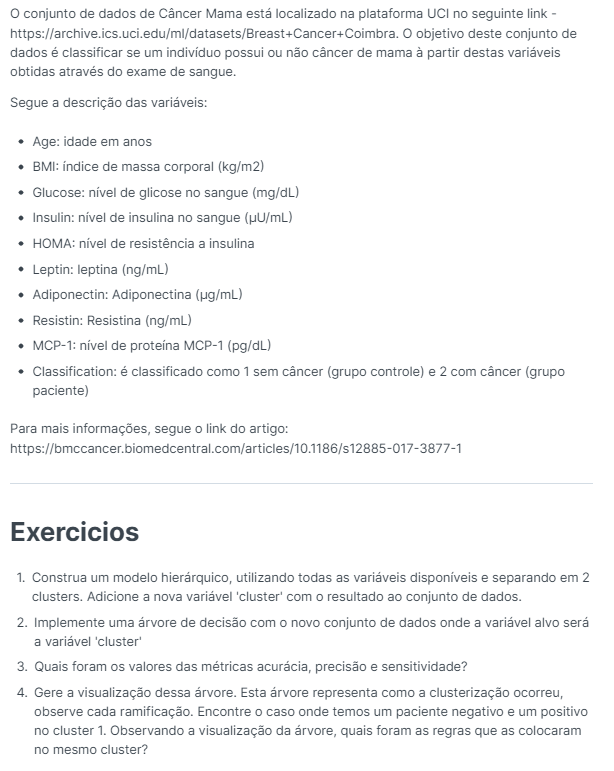

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


# 1. Construa um modelo hierárquico, utilizando todas as variáveis disponíveis e separando em 2 clusters. Adicione a nova variável 'cluster' com o resultado ao conjunto de dados.

In [ ]:
X = df.drop('Classification', axis = 1)
y = df['Classification']

X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [ ]:
ag = AgglomerativeClustering(n_clusters= 2, affinity='euclidean', linkage='ward')
y_pred = ag.fit_predict(X_std)

In [ ]:
df['cluster'] = y_pred
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,1


# 2.Implemente uma árvore de decisão com o novo conjunto de dados onde a variável alvo será a variável 'cluster'

In [ ]:
X = df.drop(['Classification','cluster'], axis = 1)
y = df['cluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

modelo_DT = DecisionTreeClassifier(random_state=10)
modelo_DT = modelo_DT.fit(X_train, y_train)

# 3. Quais foram os valores das métricas acurácia, precisão e sensitividade?

In [ ]:
y_pred_DT = modelo_DT.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_DT))
print(precision_score(y_test, y_pred_DT, average='macro'))
print(recall_score(y_test, y_pred_DT, average='macro'))

0.875
0.8706293706293706
0.8785714285714286


# 4. Gere a visualização dessa árvore. Esta árvore representa como a clusterização ocorreu, observe cada ramificação. Encontre o caso onde temos um paciente negativo e um positivo no cluster 1. Observando a visualização da árvore, quais foram as regras que as colocaram no mesmo cluster?

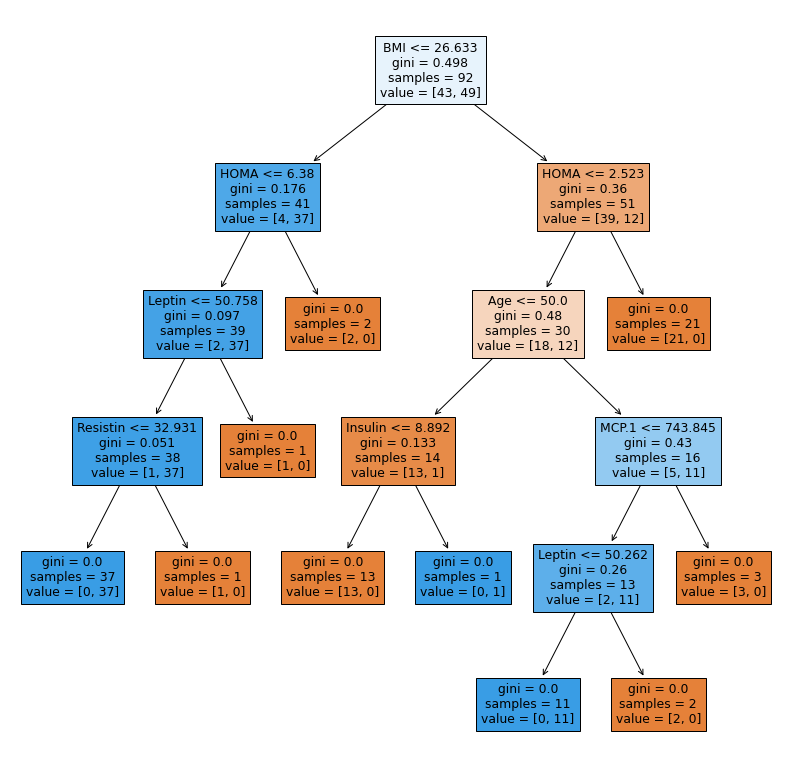

In [ ]:
plt.figure(figsize=(14,14))
plot_tree(modelo_DT, filled=True, feature_names=X.columns)
plt.show()